# Import Packages

In [1]:
import fitz
import numpy as np
import pandas as pd

## Read Data File

In [2]:
def read_pdf(pdf_path):
    with fitz.open(pdf) as doc:
        text = ""
        for page in doc:
            text += page.get_text()
        return text

In [3]:
pdf = "PreScreen_DSAI_r3.pdf"

In [4]:
pdf_string = read_pdf(pdf_path=pdf)

In [5]:
pdf_string = pdf_string.replace("\n \n \n", "\n") # Remove multiple next line characters
print(pdf_string)

 
Analytics Evaluation 
Instructions :  
 Q1 & Q2 are mandatory, Q3 is bonus if attempted.   
 Do the analytics in cloud where possible (free trial versions).   
 Other methods are also acceptable. 
 Do include documentations.     
Azure : https://studio.azureml.net/  
IBM Cognos : https://www.ibm.com/products/cognos-analytics 
 
1. A customer informed their consultant that they have developed several formulations of petrol 
that gives different characteristics of burning pattern.  The formulations are obtaining by adding 
varying levels of additives that, for example, prevent engine knocking, gum prevention, stability 
in storage, and etc.  However, a third party certification organisation would like to verify if the 
formulations are significantly different, and request for both physical and statistical proof.  Since 
the formulations are confidential information, they are not named in the dataset.   
Please assist the consultant in the area of statistical analysis by doing this;

In [6]:
paragraph = pdf_string.split("=")[-1].strip()
paragraph = paragraph.lower()

In [7]:
print(paragraph)

as a term, data analytics predominantly refers to an assortment of applications, from basic business 
intelligence (bi), reporting and online analytical processing (olap) to various forms of advanced 
analytics. in that sense, it's similar in nature to business analytics, another umbrella term for 
approaches to analyzing data -- with the difference that the latter is oriented to business uses, while 
data analytics has a broader focus. the expansive view of the term isn't universal, though: in some 
cases, people use data analytics specifically to mean advanced analytics, treating bi as a separate 
category.  data analytics initiatives can help businesses increase revenues, improve operational 
efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to 
emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of 
boosting business performance. depending on the particular application, the data that's analyzed 
can 

### 3a) What is the probability of the word “data” occurring in each line?

In [8]:
# Split the paragraph based on 'next line character'
lines = paragraph.split("\n")
lines

['as a term, data analytics predominantly refers to an assortment of applications, from basic business ',
 'intelligence (bi), reporting and online analytical processing (olap) to various forms of advanced ',
 "analytics. in that sense, it's similar in nature to business analytics, another umbrella term for ",
 'approaches to analyzing data -- with the difference that the latter is oriented to business uses, while ',
 "data analytics has a broader focus. the expansive view of the term isn't universal, though: in some ",
 'cases, people use data analytics specifically to mean advanced analytics, treating bi as a separate ',
 'category.  data analytics initiatives can help businesses increase revenues, improve operational ',
 'efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to ',
 'emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of ',
 "boosting business performance. depending on the particular appli

In [9]:
len(lines)

22

In [10]:
data_occur_list = [1 if "data" in line else 0 for line in lines]
data_occur_list

[1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]

In [11]:
probability = np.mean(data_occur_list)

In [12]:
print(f"Probability of the word “data” occurring in each line is: {probability:.3f}")

Probability of the word “data” occurring in each line is: 0.636


### 3b) What is the distribution of distinct word counts across all the lines ?

In [13]:
symbols = [",", ".", "-", "(", ")", ":"]

In [14]:
paragraph_new = paragraph

In [15]:
for symbol in symbols:
    paragraph_new = paragraph_new.replace(symbol, "")

In [16]:
paragraph_new

"as a term data analytics predominantly refers to an assortment of applications from basic business \nintelligence bi reporting and online analytical processing olap to various forms of advanced \nanalytics in that sense it's similar in nature to business analytics another umbrella term for \napproaches to analyzing data  with the difference that the latter is oriented to business uses while \ndata analytics has a broader focus the expansive view of the term isn't universal though in some \ncases people use data analytics specifically to mean advanced analytics treating bi as a separate \ncategory  data analytics initiatives can help businesses increase revenues improve operational \nefficiency optimize marketing campaigns and customer service efforts respond more quickly to \nemerging market trends and gain a competitive edge over rivals  all with the ultimate goal of \nboosting business performance depending on the particular application the data that's analyzed \ncan consist of eith

In [17]:
new_lines = paragraph_new.split("\n")
new_lines[:5]

['as a term data analytics predominantly refers to an assortment of applications from basic business ',
 'intelligence bi reporting and online analytical processing olap to various forms of advanced ',
 "analytics in that sense it's similar in nature to business analytics another umbrella term for ",
 'approaches to analyzing data  with the difference that the latter is oriented to business uses while ',
 "data analytics has a broader focus the expansive view of the term isn't universal though in some "]

In [18]:
unique_word_count_list = [len(set(line.split(" ")))for line in new_lines]
print(unique_word_count_list)

[16, 14, 14, 15, 17, 15, 12, 13, 17, 12, 16, 19, 15, 12, 17, 18, 16, 13, 15, 13, 15, 5]


In [19]:
pd.Series(unique_word_count_list).describe()

count    22.000000
mean     14.500000
std       2.890872
min       5.000000
25%      13.000000
50%      15.000000
75%      16.000000
max      19.000000
dtype: float64

In [20]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

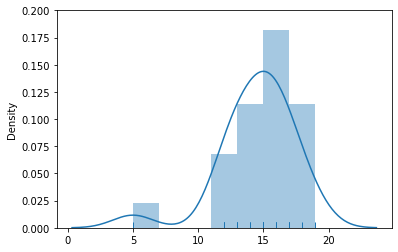

In [21]:
df_unique_words = pd.DataFrame(unique_word_count_list)
sns.distplot(unique_word_count_list, kde=True, rug=True);

* NORMALLY DISTRIBUTED - to an extent.

### 3c) What is the probability of the word “analytics” occurring after the word “data” ? 

In [22]:
whole_paragraph = paragraph_new.replace("\n", "").replace("  ", "")

In [23]:
whole_paragraph

"as a term data analytics predominantly refers to an assortment of applications from basic business intelligence bi reporting and online analytical processing olap to various forms of advanced analytics in that sense it's similar in nature to business analytics another umbrella term for approaches to analyzing datawith the difference that the latter is oriented to business uses while data analytics has a broader focus the expansive view of the term isn't universal though in some cases people use data analytics specifically to mean advanced analytics treating bi as a separate categorydata analytics initiatives can help businesses increase revenues improve operational efficiency optimize marketing campaigns and customer service efforts respond more quickly to emerging market trends and gain a competitive edge over rivalsall with the ultimate goal of boosting business performance depending on the particular application the data that's analyzed can consist of either historical records or n

In [24]:
whole_paragraph.count("data analytics") / whole_paragraph.count("data")

0.3333333333333333